In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings("ignore")

# Data preprocessing

In [2]:
malPopData= pd.read_csv("Malaysia Population by States - Sheet1.csv")
print(malPopData.shape)
shopeeData=pd.read_csv("shopee_sample_data.csv")
print(shopeeData.shape)

(18, 8)
(42425, 22)


In [3]:
malPopData = malPopData.dropna()
malPopData

,State[16],Population,Area (km2),Pop. density,Urban pop.(%),Bumiputra (%),Chinese (%),Indian (%)
0,Johor,"3,348,283","19,210",174,71.9,58.9,33.6,7.1
1,Kedah,"1,890,098","9,500",199,64.6,77.9,13.6,7.3
2,Kelantan,"1,459,994","15,099",97,42.4,95.7,3.4,0.3
3,Malacca,"788,706","1,664",470,86.5,66.9,26.4,6.2
4,Negeri Sembilan,"997,071","6,686",150,66.5,61.3,23.2,15.2
5,Pahang,"1,443,365","36,137",40,50.5,79.0,16.2,4.4
6,Penang,"1,520,143","1,048","1,500",90.8,43.6,45.6,10.4
7,Perak,"2,258,428","21,035",110,69.7,57.0,30.4,12.2
8,Perlis,"227,025",821,280,51.4,88.4,8.0,1.2
9,Selangor,"5,411,324","8,104",670,91.4,57.1,28.6,13.5


In [4]:
malPopData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State[16]      16 non-null     object 
 1   Population     16 non-null     object 
 2   Area (km2)     16 non-null     object 
 3   Pop. density   16 non-null     object 
 4   Urban pop.(%)  16 non-null     float64
 5   Bumiputra (%)  16 non-null     float64
 6   Chinese (%)    16 non-null     float64
 7   Indian (%)     16 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.1+ KB


In [5]:
shopeeData.head()

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,...,idHash,seller_details,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc
0,29.16,Shipping Pre-Order (ships in 11 days) Shipping...,Shopee | Women's Clothing | Skirts,Category Shopee Women's Clothing Skirts Brand ...,Alice's new elegant style ultra-fairy French d...,20201123.0,https://shopee.com.my/Alice's-new-elegant-styl...,NaN,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,...,97dcb011fc73ec4b3c31eed989ae0094,8ysl9a1301 Active 3 hours ago chat now view sh...,"Lubok China, 000001 Melaka",0,6.445109e+09,https://cf.shopee.com.my/file/63256421fb228665...,NaN,80,1.606064e+12,Promotions: Summer's new elegant style ins sup...
1,57.78,Shipping Free shipping Free shipping for order...,Shopee | Women's Clothing | Dresses | Midi Dre...,Category Shopee Women's Clothing Dresses Midi ...,👍👍Korean Vintage Style Square Neck Slim Midi D...,20201123.0,https://shopee.com.my/👍👍Korean-Vintage-Style-S...,NaN,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,...,5b870a335a74b055c9a24083da6e925a,showcasemywardore Active 3 hours ago chat now ...,"KLCC, 50088 Kuala Lumpur",1,5.445225e+09,https://cf.shopee.com.my/file/559058f73c771491...,NaN,61,1.606064e+12,- Color: Multicolor\n\n- Material: Polyester\n...
2,82.00,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Sleeveless Drawstring Pleated Swi...,20201123.0,https://shopee.com.my/ZANZEA-Women-Sleeveless-...,5.0,zanzea.os,8ef1159741c3ad608ab376a1def1a8d5,...,fb6977c44fd154310f800c3155594121,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,3,4.843064e+09,https://cf.shopee.com.my/file/5ce472482e927cf4...,3,24,1.606064e+12,Item Type:Dress\nMaterial: Cotton \nColors:Gre...
3,115.00,"Shipping Free shipping Shipping to KL City, Ku...",Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,AIR SPACE V-Neck Ruffle Sleeve Tassel Side Tie...,20201123.0,https://shopee.com.my/AIR-SPACE-V-Neck-Ruffle-...,NaN,airspacemy.os,e5f6337f3faa4badad794fb211b35c61,...,5c935733c665ede79faa95d00e146d11,airspacemy.os Active 14 minutes ago chat now v...,"Kuala Langat, 42500 Selangor",0,6.245303e+09,https://cf.shopee.com.my/file/fdab91ad3c366064...,NaN,28,1.606064e+12,Welcome to Air Space Malaysia Official where w...
4,40.90,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Crew Neck Long Sleeve Ethnic Vint...,20201123.0,https://shopee.com.my/ZANZEA-Women-Crew-Neck-L...,4.8,zanzea.os,3dbb5a357043464af36d6591d215a19c,...,e806e77f75c6bc43ad52adf457dd7004,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,123,3.430108e+09,https://cf.shopee.com.my/file/0af4b832a74478f1...,242,744,1.606064e+12,Material:Cotton\nPackage?included:1Dress\nColo...


In [6]:
shopeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42425 entries, 0 to 42424
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_ori             42267 non-null  float64
 1   delivery              42363 non-null  object 
 2   item_category_detail  42363 non-null  object 
 3   specification         42363 non-null  object 
 4   title                 42363 non-null  object 
 5   w_date                42363 non-null  float64
 6   link_ori              42363 non-null  object 
 7   item_rating           38623 non-null  float64
 8   seller_name           42363 non-null  object 
 9   idElastic             42363 non-null  object 
 10  price_actual          42335 non-null  float64
 11  sitename              42363 non-null  object 
 12  idHash                42363 non-null  object 
 13  seller_details        41671 non-null  object 
 14  location              33756 non-null  object 
 15  total_rating       

In [7]:
shopeeData.isnull().sum()

price_ori                158
delivery                  62
item_category_detail      62
specification             62
title                     62
w_date                    62
link_ori                  62
item_rating             3802
seller_name               62
idElastic                 62
price_actual              90
sitename                  62
idHash                    62
seller_details           754
location                8669
total_rating              62
id                        62
pict_link                 62
total_sold              3802
favorite                2717
timestamp                 62
desc                      62
dtype: int64

In [8]:
shopeeData=shopeeData.fillna(method='bfill')

In [9]:
shopeeData.isnull().sum()

price_ori               0
delivery                0
item_category_detail    0
specification           0
title                   0
w_date                  0
link_ori                0
item_rating             0
seller_name             0
idElastic               0
price_actual            0
sitename                0
idHash                  0
seller_details          0
location                1
total_rating            0
id                      0
pict_link               0
total_sold              0
favorite                0
timestamp               0
desc                    0
dtype: int64

In [10]:
shopeeData = shopeeData.dropna()

# Question 1

In [11]:
unique_prod=shopeeData.drop_duplicates('id')
unique_prod[unique_prod['w_date']<20201201.0]

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,...,idHash,seller_details,location,total_rating,id,pict_link,total_sold,favorite,timestamp,desc
0,29.16,Shipping Pre-Order (ships in 11 days) Shipping...,Shopee | Women's Clothing | Skirts,Category Shopee Women's Clothing Skirts Brand ...,Alice's new elegant style ultra-fairy French d...,20201123.0,https://shopee.com.my/Alice's-new-elegant-styl...,5.0,8ysl9a1301,6e1e3d7b51a4c1099c368114ab91a88a,...,97dcb011fc73ec4b3c31eed989ae0094,8ysl9a1301 Active 3 hours ago chat now view sh...,"Lubok China, 000001 Melaka",0,6.445109e+09,https://cf.shopee.com.my/file/63256421fb228665...,3,80,1.606064e+12,Promotions: Summer's new elegant style ins sup...
1,57.78,Shipping Free shipping Free shipping for order...,Shopee | Women's Clothing | Dresses | Midi Dre...,Category Shopee Women's Clothing Dresses Midi ...,👍👍Korean Vintage Style Square Neck Slim Midi D...,20201123.0,https://shopee.com.my/👍👍Korean-Vintage-Style-S...,5.0,showcasemywardore,a4248a77a54045ea69f18cb87ada6fb2,...,5b870a335a74b055c9a24083da6e925a,showcasemywardore Active 3 hours ago chat now ...,"KLCC, 50088 Kuala Lumpur",1,5.445225e+09,https://cf.shopee.com.my/file/559058f73c771491...,3,61,1.606064e+12,- Color: Multicolor\n\n- Material: Polyester\n...
2,82.00,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Sleeveless Drawstring Pleated Swi...,20201123.0,https://shopee.com.my/ZANZEA-Women-Sleeveless-...,5.0,zanzea.os,8ef1159741c3ad608ab376a1def1a8d5,...,fb6977c44fd154310f800c3155594121,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,3,4.843064e+09,https://cf.shopee.com.my/file/5ce472482e927cf4...,3,24,1.606064e+12,Item Type:Dress\nMaterial: Cotton \nColors:Gre...
3,115.00,"Shipping Free shipping Shipping to KL City, Ku...",Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,AIR SPACE V-Neck Ruffle Sleeve Tassel Side Tie...,20201123.0,https://shopee.com.my/AIR-SPACE-V-Neck-Ruffle-...,4.8,airspacemy.os,e5f6337f3faa4badad794fb211b35c61,...,5c935733c665ede79faa95d00e146d11,airspacemy.os Active 14 minutes ago chat now v...,"Kuala Langat, 42500 Selangor",0,6.245303e+09,https://cf.shopee.com.my/file/fdab91ad3c366064...,242,28,1.606064e+12,Welcome to Air Space Malaysia Official where w...
4,40.90,Shipping Free shipping Shipping from overseas ...,Shopee | Women's Clothing | Dresses | Maxi Dre...,Category Shopee Women's Clothing Dresses Maxi ...,ZANZEA Women Crew Neck Long Sleeve Ethnic Vint...,20201123.0,https://shopee.com.my/ZANZEA-Women-Crew-Neck-L...,4.8,zanzea.os,3dbb5a357043464af36d6591d215a19c,...,e806e77f75c6bc43ad52adf457dd7004,zanzea.os Active 37 minutes ago chat now view ...,Mainland China,123,3.430108e+09,https://cf.shopee.com.my/file/0af4b832a74478f1...,242,744,1.606064e+12,Material:Cotton\nPackage?included:1Dress\nColo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36135,51.12,Shipping Free shipping Shipping from Mainland ...,Shopee | Women's Clothing | Dresses | Mini Dre...,Category Shopee Women's Clothing Dresses Mini ...,ZANZEA Women's V Neck Buttons Plus Size Long S...,20201126.0,https://shopee.com.my/ZANZEA-Women's-V-Neck-Bu...,4.9,zanzea.os,cbd1a562f47333f84b7f3d39fcd57ebf,...,a6c5ea6be0e274bb74fe751431110762,zanzea.os online chat now view shop Ratings294...,Mainland China,4.2k,1.242385e+09,https://cf.shopee.com.my/file/bf38272e469f08ec...,9k,6.2k,1.606324e+12,Welcome to Zanzea Official Store where we stri...
36136,35.90,Shipping Free shipping Shipping from Mainland ...,Shopee | Women's Clothing | Dresses | Mini Dre...,Product Specifications Category Shopee Women's...,ZANZEA Women's Cotton Casual Boho Loose Party ...,20201126.0,https://shopee.com.my/ZANZEA-Women's-Cotton-Ca...,4.9,zanzea.os,945cc4040247b13e4d0fff1dac3b82fa,...,cbad7c893cfee7f

# Question 2

In [12]:
shopeeData['w_date'].value_counts()

20201124.0    25347
20201123.0    10726
20201201.0     5801
20201202.0      483
20201125.0       52
20201126.0       15
Name: w_date, dtype: int64

# Question 3

In [13]:
malaysia_states = ['Johor', 'Jedah', 'Jelantan', 'Perak', 'Selangor', 'Melaka','kedah',  
                  'Negeri Sembilan', 'Pahang', 'Perlis', 'Penang', 'Sabah', 'Sarawak', 
                   'Terengganu', 'Kuala Lumpur']

In [14]:
state = []
for i in range(len(shopeeData)):
    if any(state in shopeeData['location'][i] for state in malaysia_states):
            if(shopeeData['location'][i].split()[-1] in ['Lumpur', 'Sembilan']):
                if(shopeeData['location'][i].split()[-1] == 'Lumpur'):
                    state.append('Selangor')
                else:
                    state.append(shopeeData['location'][i].split()[-2]+' '+shopeeData['location'][i].split()[-1])
            else:
                state.append(shopeeData['location'][i].split()[-1])
    else:
        state.append('Oversea')

In [15]:
shopeeData['state'] = state

In [16]:
shopeeData['state'].value_counts()

Selangor           21580
Oversea             7532
Johor               3670
Penang              3173
Perak               2561
Negeri Sembilan     1011
Terengganu           848
Melaka               799
Pahang               647
Perlis               246
Sarawak              183
Sabah                174
Name: state, dtype: int64

# Question 4

In [17]:
mainCategory= []
subCategory1= []
subCategory2= []

for i in range(len(shopeeData)):
    mainCategory.append(shopeeData['item_category_detail'][i].split('|')[1].strip())
    if(len(shopeeData['item_category_detail'][i].split('|'))>3):
        subCategory1.append(shopeeData['item_category_detail'][i].split('|')[2].strip())
    else:
        subCategory1.append('Not Available')
    if(len(shopeeData['item_category_detail'][i].split('|'))>3):
        subCategory2.append(shopeeData['item_category_detail'][i].split('|')[3].strip())
    else:
        subCategory2.append('Not Available')


In [18]:
shopeeData['main_category'] = mainCategory
shopeeData['sub_category_1'] = subCategory1
shopeeData['sub_category_2'] = subCategory2

### Question 4.a

In [19]:
shopeeData['main_category'].value_counts().index[2]

'Games, Books & Hobbies'

In [20]:
shopeeData[shopeeData['main_category']==shopeeData['main_category'].value_counts().index[0]]['sub_category_1'].value_counts().idxmax()

'Snacks'

In [21]:
shopeeData[shopeeData['main_category']==shopeeData['main_category'].value_counts().index[1]]['sub_category_1'].value_counts().idxmax()

"Men's Watches"

In [22]:
shopeeData[shopeeData['main_category']==shopeeData['main_category'].value_counts().index[2]]['sub_category_1'].value_counts().idxmax()

'Books'

### Question 4.b

In [23]:
shopeeData[shopeeData['main_category']==shopeeData['main_category'].value_counts().index[0]]['price_ori'].value_counts().index[0:10]

Float64Index([15.0, 10.0, 20.0, 12.0, 8.0, 5.0, 6.0, 25.0, 5.5, 18.0], dtype='float64')

In [24]:
shopeeData[shopeeData['main_category']==shopeeData['main_category'].value_counts().index[0]]['price_ori'].value_counts().index[-10:]

Float64Index([17.44, 14.65, 19.1, 167.5, 7.44, 8.97, 50.5, 20.78, 6.36, 173.0], dtype='float64')

# Question 5

In [25]:
shopeeData.groupby(['state', 'main_category']).count()

price_ori  delivery  item_category_detail  \
state      main_category                                                       
Johor      Automotive                     85        85                    85   
           Baby & Toys                   345       345                   345   
           Cameras & Drones                8         8                     8   
           Computer & Accessories         32        32                    32   
           Fashion Accessories            56        56                    56   
...                                      ...       ...                   ...   
Terengganu Tickets & Vouchers              4         4                     4   
           Watches                        57        57                    57   
           Women's Bags                   49        49                    49   
           Women's Clothing               77        77                    77   
           Women's Shoes                   4         4                     4   

                                   specification  title  w_date  link_ori  \
state      main_category                                                    
Johor      Automotive                         85     85      85        85   
           Baby & Toys                       345    345     345       345   
           Cameras & Drones                    8      8       8         8   
           Computer & Accessories             32     32      32        32   
           Fashion Accessories                56     56      56        56   
...                                          ...    ...     ...       ...   
Terengganu Tickets & Vouchers                  4      4       4         4   
           Watches                            57     57      57        57   
           Women's Bags                       49     49      49        49   
           Women's Clothing                   77     77      77        77   
           Women's Shoes                       4      4       4         4   

                                   item_rating  seller_name  idElastic  ...  \
state      main_category                                                ...   
Johor      Automotive                       85           85         85  ...   
           Baby & Toys                     345          345        345  ...   
           Cameras & Drones                  8            8          8  ...   
           Computer & Accessories           32           32         32  ...   
           Fashion Accessories              56           56         56  ...   
...                                        ...          ...        ...  ...   
Terengganu Tickets & Vouchers                4            4          4  ...   
           Watches                          57           57         57  ...   
           Women's Bags                     49           49         49  ...   
           Women's Clothing                 77           77         77  ...   
           Women's Shoes                     4            4          4  ...   

                                   location  total_rating   id  pict_link  \
state      main_category                                                    
Johor      Automotive                    85            85   85         85   
           Baby & Toys                  345           345  345        345   
           Cameras & Drones               8             8    8          8   
           Computer & Accessories        32            32   32         32   
           Fashion Accessories           56            56   56         56   
...                                     ...           ...  ...        ...   
Terengganu Tickets & Vouchers             4             4    4          4   
           Watches                       57            57   57         57   
           Women's Bags                  49            49   49         49   
           Women's Clothing              77            77   77         77   
           Women's Shoes                

# Question 6

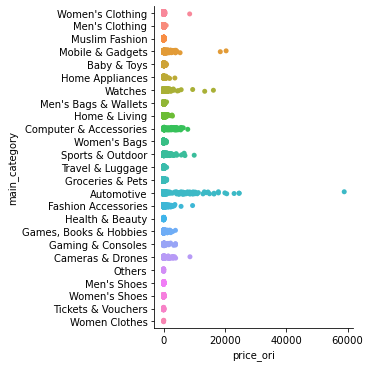

In [26]:
sns.catplot(x='price_ori', y="main_category", data=shopeeData, margin_titles = True, height=5)

# Question 7

### Question 7.a

In [27]:
shopeeData.groupby('seller_name')['id'].count().sort_values(ascending=False)[:10]

seller_name
swtrading              507
bestpricestore         481
skmei.os               470
jireh_c                397
winnie_choo            273
karyasenishoppe        269
bigplayerclothing      232
supermanmotor          225
butikbos               211
mentorpublishing.os    203
Name: id, dtype: int64

### Question 7.b

In [28]:
shopeeData['is_local']=shopeeData['state'].apply(lambda x: 0 if x is 'Oversea' else 1)

In [29]:
shopeeData['is_local'].value_counts().apply(lambda x: x/len(shopeeData)*100).set_axis(['Local', 'Oversea'])

Local      82.245899
Oversea    17.754101
Name: is_local, dtype: float64

### Question 7.c

In [30]:
def value_to_float(x):
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if type(x) == float or type(x) == str:
        return x
    return 0.0

shopeeData['total_sold'] = shopeeData['total_sold'].apply(value_to_float)

In [31]:
revenue = []
for i in range(len(shopeeData)): 
    revenue.append(float(shopeeData['total_sold'][i])*float(shopeeData['price_actual'][i]))
shopeeData['revenue'] = revenue

Text(0, 0.5, 'Revenue')

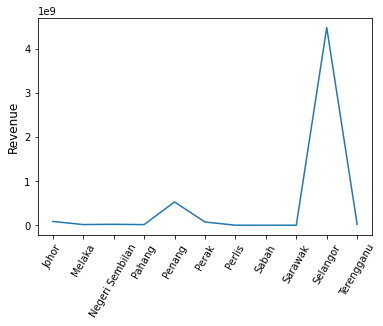

In [32]:
local_seller= shopeeData[shopeeData['is_local'] == 1]
sller_rev=local_seller.groupby('state').agg(
    rev=('revenue','sum'),
    )
plt.plot((sller_rev['rev']))
plt.xticks(rotation=60)
plt.ylabel('Revenue', fontsize=12)

### Question 7.D

In [33]:
sller_rev.sort_values('rev',ascending=False)[0:3]

,rev
state,
Selangor,4.474848e+09
Penang,5.282338e+08
Johor,8.728404e+07


### Question 7.e

In [34]:
avg_pri=shopeeData.groupby('seller_name').agg(
    avg_pri=('price_actual','mean'),
    is_local= ('is_local', 'max')
    )

Text(0, 0.5, 'Avg_Price')

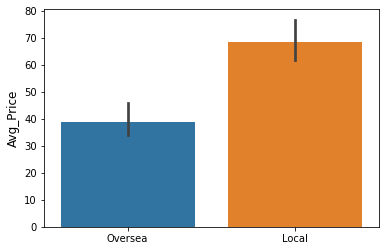

In [35]:
ax=sns.barplot(avg_pri['is_local'], avg_pri['avg_pri'])
ax.set_xticklabels(['Oversea', 'Local'])
ax.set_xlabel('')
ax.set_ylabel('Avg_Price', fontsize=12)

### Question 7.f

In [36]:
join_age = []
for i in range(len(shopeeData)):
    if('joined' in shopeeData['seller_details'][i]):
        if('joined'+re.findall(r'\d+.\d+|\d+', shopeeData['seller_details'][i])[-2]+ ' months' in shopeeData['seller_details'][i]):
            join_age.append(int(re.findall(r'\d+.\d+|\d+', shopeeData['seller_details'][i])[-2])/12)
        else:
            join_age.append(re.findall(r'\d+.\d+|\d+', shopeeData['seller_details'][i])[-2])
    else:
        join_age.append(join_age[i-1])# fill not known age with previous seller age

for i in range(len(join_age)):
    if float(join_age[i])>5:
        join_age[i]='> 5 years'
    elif float(join_age[i])>3:
        join_age[i]='3-5 years'
    elif float(join_age[i])>1:
        join_age[i]='1-3 years'
    else:
        join_age[i]='< 1 years'
shopeeData['join_age']=join_age

<AxesSubplot:>

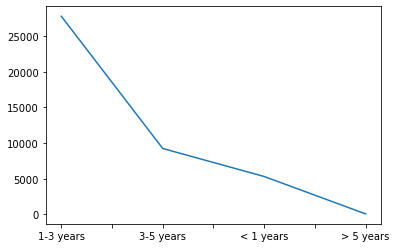

In [37]:
shopeeData['join_age'].value_counts().plot()

### Question 7.g

In [38]:
malPopData['State[16]'][3]='Melaka' #Because it written different in the location from the one in the population dataset

In [39]:
malPopData[malPopData['State[16]'] == (shopeeData['state'][42423])]['Population']

Series([], Name: Population, dtype: object)

In [40]:
population = []
for i in range(len(shopeeData)):
    if(shopeeData['state'][i] is not 'Oversea'):
        val=malPopData[malPopData['State[16]'] == (shopeeData['state'][i])]['Population']
        population.append(int(val.values[0].replace(',' , '')))
    else:
        population.append(0)
shopeeData['population'] = population

In [41]:
seller_pop = shopeeData.groupby('state').agg(
    num_seller= ('seller_name', 'count'),
    pop= ('population', 'min')
    )

In [42]:
seller_pop=seller_pop.drop('Oversea')


In [43]:
seller_pop

,num_seller,pop
state,,
Johor,3670,3348283
Melaka,799,788706
Negeri Sembilan,1011,997071
Pahang,647,1443365
Penang,3173,1520143
Perak,2561,2258428
Perlis,246,227025
Sabah,174,3117405
Sarawak,183,2420009


Text(0, 0.5, 'Number Of Seller')

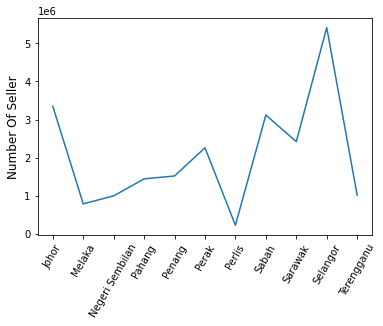

In [44]:
plt.plot(seller_pop['pop'])
plt.xticks(rotation=60)
plt.ylabel('Number Of Seller', fontsize=12)